C:\Users\hp\AppData\Local\Temp\ipykernel_22928\112319839.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store_data = pd.read_csv('../data/train.csv')
[2025-01-04 11:28:16,313]: Merged train and store data.:
[2025-01-04 11:28:16,313]: Handling missing values.:
C:\Users\hp\AppData\Local\Temp\ipykernel_22928\112319839.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CompetitionDistance'].fillna(data['CompetitionDistance'].median(), inplace=True)
[2025-01-04 1

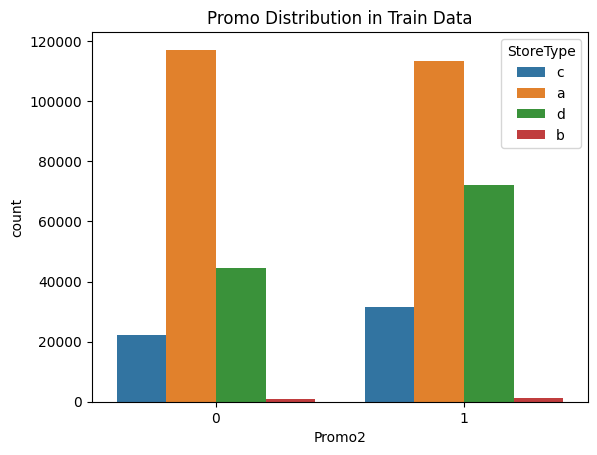

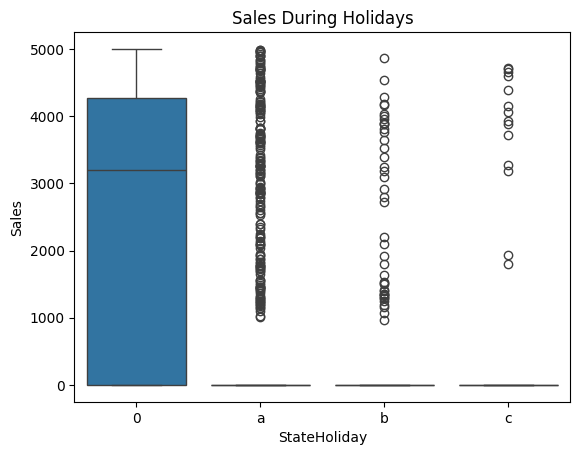

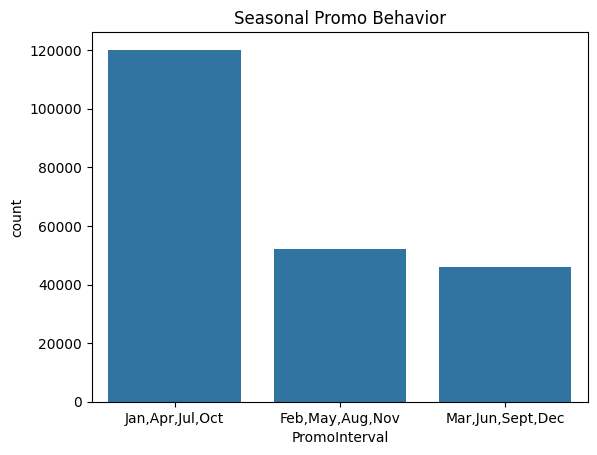

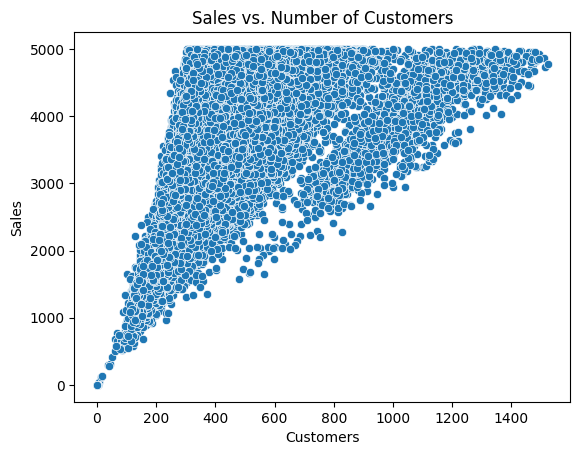

[2025-01-04 11:28:20,025]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
[2025-01-04 11:28:20,216]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


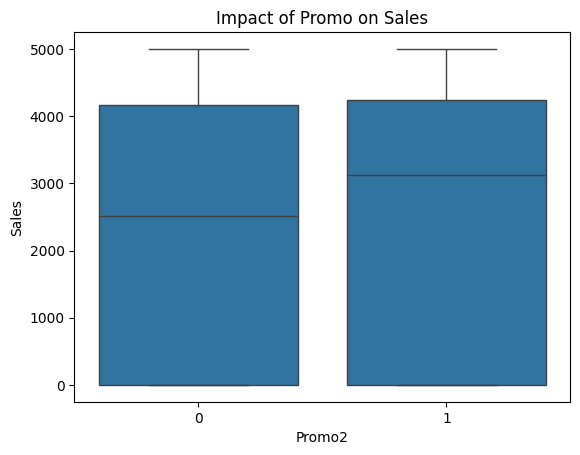

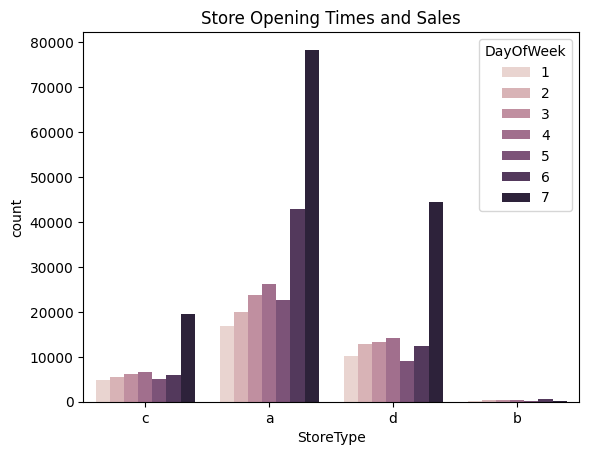

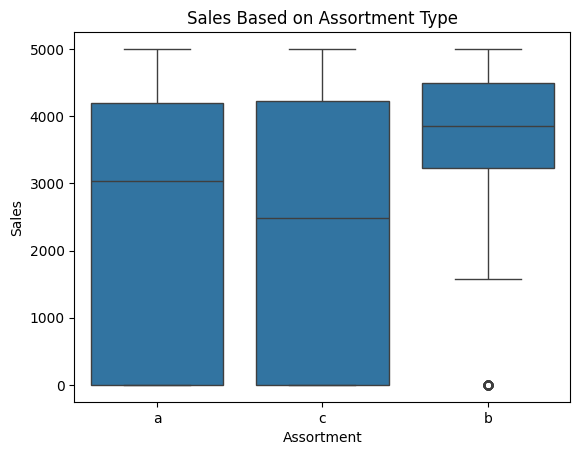

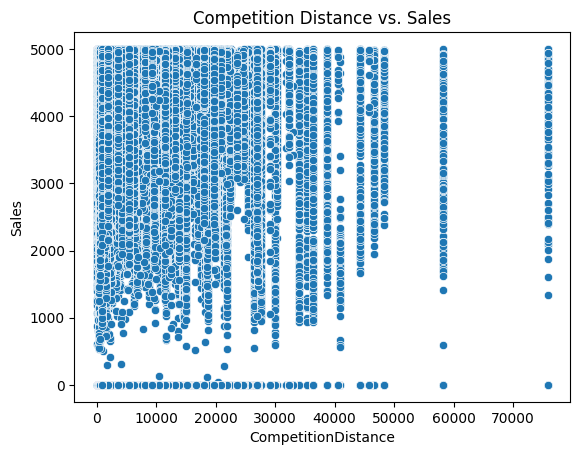

[2025-01-04 11:28:22,539]: Found 0 stores with NA competitor distance.:
[2025-01-04 11:28:22,761]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
[2025-01-04 11:28:22,935]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
[2025-01-04 11:28:23,085]: Saved visualization: impact_of_promo_on_sales.png:


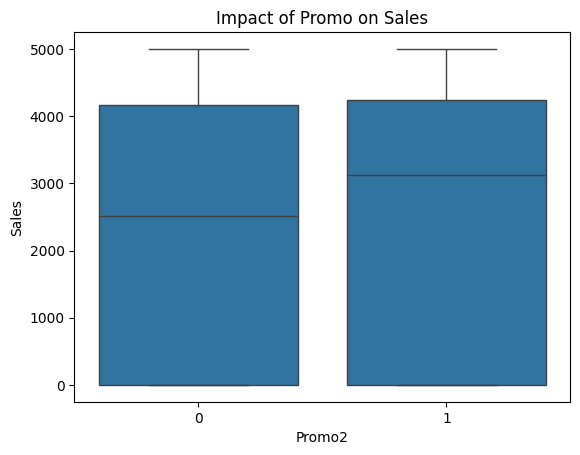

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='[%(asctime)s]: %(message)s:')

# Step 1: Load the data
train_data = pd.read_csv('../data/store.csv')
test_data = pd.read_csv('../data/test.csv')
store_data = pd.read_csv('../data/train.csv')

# Step 2: Merge datasets
data = pd.merge(train_data, store_data, on="Store", how="left")
logging.info("Merged train and store data.")

# Step 3: Data cleaning (handle missing values and outliers)
logging.info("Handling missing values.")
data['CompetitionDistance'].fillna(data['CompetitionDistance'].median(), inplace=True)
data.dropna(subset=['Sales'], inplace=True)  # Drop rows with missing sales

# Handle outliers (Example: sales > 5000)
logging.info("Handling outliers.")
data = data[data['Sales'] <= 5000]

# Step 4: Exploratory Data Analysis

# Check distribution of promo in train vs test set
sns.countplot(data=data, x='Promo2', hue='StoreType')
plt.title('Promo Distribution in Train Data')
plt.show()

# Analyze sales before, during, and after holidays (assuming holidays are marked in data)
sns.boxplot(x='StateHoliday', y='Sales', data=data)
plt.title('Sales During Holidays')
plt.show()

# Seasonal purchase behavior - example using 'PromoInterval'
sns.countplot(x='PromoInterval', data=data)
plt.title('Seasonal Promo Behavior')
plt.show()

# Correlation between sales and number of customers (if available in the data)
sns.scatterplot(x='Customers', y='Sales', data=data)
plt.title('Sales vs. Number of Customers')
plt.show()

# Impact of promo on sales
sns.boxplot(x='Promo2', y='Sales', data=data)
plt.title('Impact of Promo on Sales')
plt.show()

# Check store opening and closing trends
sns.countplot(x='StoreType', hue='DayOfWeek', data=data)
plt.title('Store Opening Times and Sales')
plt.show()

# Sales based on assortment types
sns.boxplot(x='Assortment', y='Sales', data=data)
plt.title('Sales Based on Assortment Type')
plt.show()

# Distance to competitors and sales correlation
sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
plt.title('Competition Distance vs. Sales')
plt.show()

# Analyze stores with NA competitor distance that later have values
na_competitors = data[data['CompetitionDistance'].isna()]
logging.info(f"Found {len(na_competitors)} stores with NA competitor distance.")

# Step 5: Save visualizations to files
sns.boxplot(x='Promo2', y='Sales', data=data)
plt.title('Impact of Promo on Sales')
plt.savefig('impact_of_promo_on_sales.png')
logging.info("Saved visualization: impact_of_promo_on_sales.png")

# Continue saving other visualizations similarly
